<a href="https://colab.research.google.com/github/AdrianeBorsatto/Modelo_predicao_concentracao_bactericida_inibitoria/blob/main/concentracao_inibitoria_bactericida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de predição para as concentrações bactericidas e concentrações inibitórias mínimas, testadas com os produtos A e Py

In [436]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [437]:
concentracao= pd.read_excel('/content/CIMCBMbiofilme.xlsx')

In [438]:
concentracao

,BAC,conc_inib_a,conc_bact_a,conc_inib_py,conc_bact_py,dens_otica
0,SH1,2000,2000,62.5,1000,0.101208
1,SH2,2000,4000,250.0,1000,0.052694
2,SH3,2000,4000,250.0,1000,0.059556
3,SH4,2000,4000,250.0,1000,0.104444
4,SH5,2000,4000,250.0,1000,0.067889
5,SH6,1000,2000,500.0,1000,0.055444
6,SH7,2000,2000,1000.0,1000,0.102778
7,SH8,1000,2000,500.0,1000,0.062444
8,SH9,1000,2000,250.0,1000,0.101667
9,SH10,2000,4000,125.0,1000,0.082556


# As médias, desvio padrão e os mínimos, máximos, e as medianas apresentadas abaixo:

In [439]:
concentracao.describe()

,conc_inib_a,conc_bact_a,conc_inib_py,conc_bact_py,dens_otica
count,21.000000,21.000000,21.000000,21.0,21.000000
mean,1761.904762,3142.857143,306.547619,1000.0,0.074829
std,436.435780,1014.185106,203.393824,0.0,0.019891
min,1000.000000,2000.000000,62.500000,1000.0,0.052694
25%,2000.000000,2000.000000,250.000000,1000.0,0.058778
50%,2000.000000,4000.000000,250.000000,1000.0,0.067597
75%,2000.000000,4000.000000,250.000000,1000.0,0.090556
max,2000.000000,4000.000000,1000.000000,1000.0,0.108194


Text(0, 0.5, 'densidade ótica')

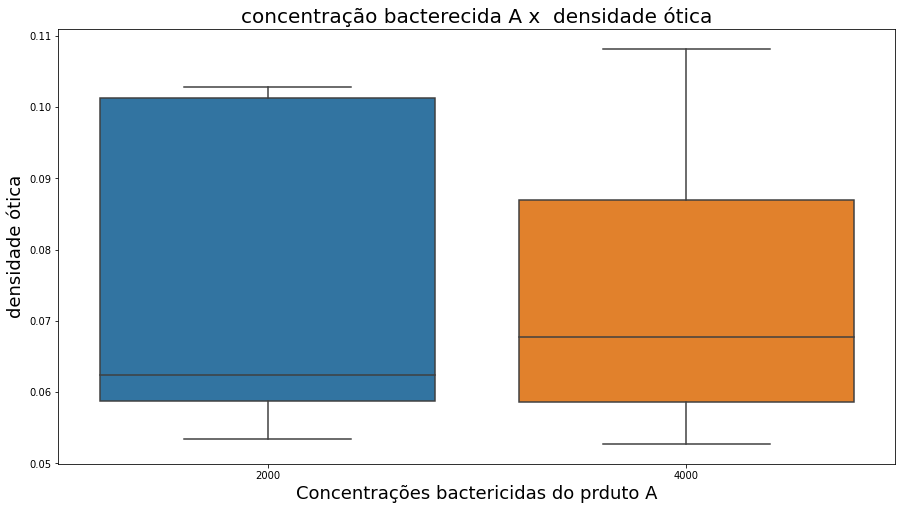

In [530]:
plt.figure(figsize=(15,8))
sns.boxplot(x='conc_bact_a', y='dens_otica', data=concentracao)
plt.title('concentração bacterecida A x  densidade ótica', fontsize=20)
plt.xlabel('Concentrações bactericidas do prduto A', fontsize=18)
plt.ylabel('densidade ótica', fontsize=18)

## Gráfico 1: Dois boxplot, representam duas concentrações testadas, com resultados de densidades óticas particulares para cada um, a mediana e o terceiro quantisl(75%) diferem um do outro, para o produto A.

Text(0, 0.5, 'densidade ótica')

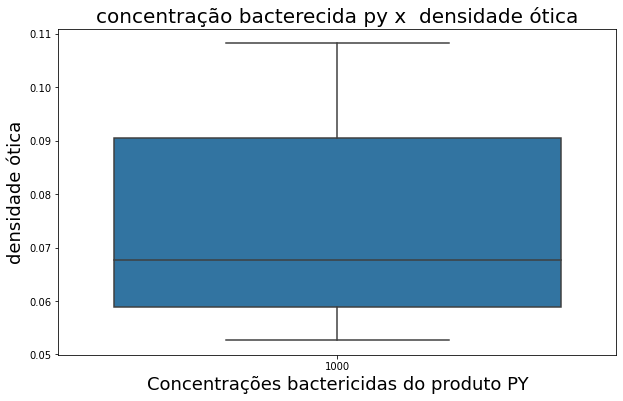

In [532]:
plt.figure(figsize=(10,6))
sns.boxplot(x='conc_bact_py', y='dens_otica', data=concentracao)
plt.title('concentração bacterecida py x  densidade ótica', fontsize=20)

plt.xlabel('Concentrações bactericidas do produto PY', fontsize=18)
plt.ylabel('densidade ótica', fontsize=18)

## Gráfico 2: Uma concentração do produto testada 1000 para o produto Py;

Text(0, 0.5, 'Concentrações mínima inibitórias estudadas')

<Figure size 1440x864 with 0 Axes>

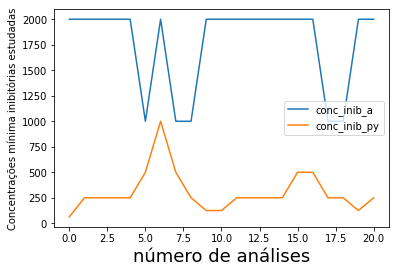

In [539]:
plt.figure(figsize=(20,12))
concentracao[['conc_inib_a','conc_inib_py']].plot()
plt.xlabel('número de análises', fontsize=18)
plt.ylabel('Concentrações mínima inibitórias estudadas', fontsize=10)

## Gráfico 3: Concentração inibitória mínima para os dois compostos estudados

Text(0, 0.5, 'Concentrações bactericidas estudadas')

<Figure size 1440x864 with 0 Axes>

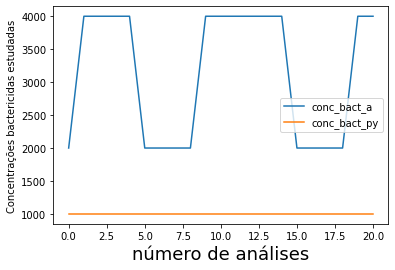

In [541]:
plt.figure(figsize=(20,12))
concentracao[['conc_bact_a','conc_bact_py']].plot()
plt.xlabel('número de análises', fontsize=18)
plt.ylabel('Concentrações bactericidas estudadas', fontsize=10)

## Gráfico 4: As concentrações batericidas do produto A e 1 concentração para o produto py;

Text(0, 0.5, 'Concentrações estudadas')

<Figure size 1440x864 with 0 Axes>

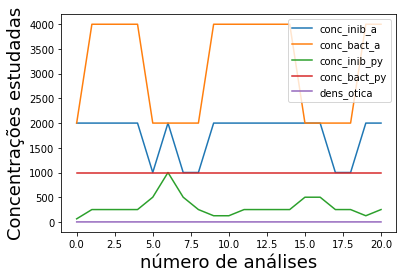

In [543]:
plt.figure(figsize=(20,12))
concentracao.plot()
plt.xlabel('número de análises', fontsize=18)
plt.ylabel('Concentrações estudadas', fontsize=18)

In [544]:
concentracao=concentracao[['conc_inib_a', 'conc_bact_a', 'conc_inib_py', 'conc_bact_py', 'dens_otica']]


## Foi avaliada as correlações entre as variáveis: houve uma correlação de 64.54% entre a concentração inib. do produto A  com a concentração bacterecida do produto A, e a concentração inib. do produto A de 24.40% com a densidade ótica. Já para o concentração inib. do produto py não foi calculado;


In [448]:
concentracao.corr()

,conc_inib_a,conc_bact_a,conc_inib_py,conc_bact_py,dens_otica
conc_inib_a,1.000000,0.645497,-0.122376,NaN,0.244028
conc_bact_a,0.645497,1.000000,-0.510751,NaN,-0.027923
conc_inib_py,-0.122376,-0.510751,1.000000,NaN,-0.007548
conc_bact_py,NaN,NaN,NaN,NaN,NaN
dens_otica,0.244028,-0.027923,-0.007548,NaN,1.000000


## Mapa de calor para a correlação

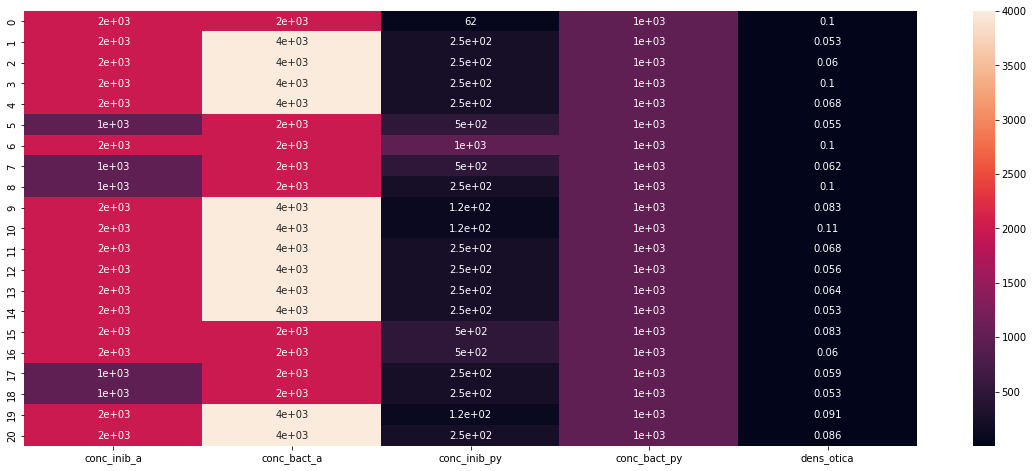

In [547]:
plt.figure(figsize=(20,8))
sns.heatmap(data=concentracao, linecolor='white', annot=True)

# Gráficos que mostram a regressão entre cada variável. Algumas positivas , outras negativas.

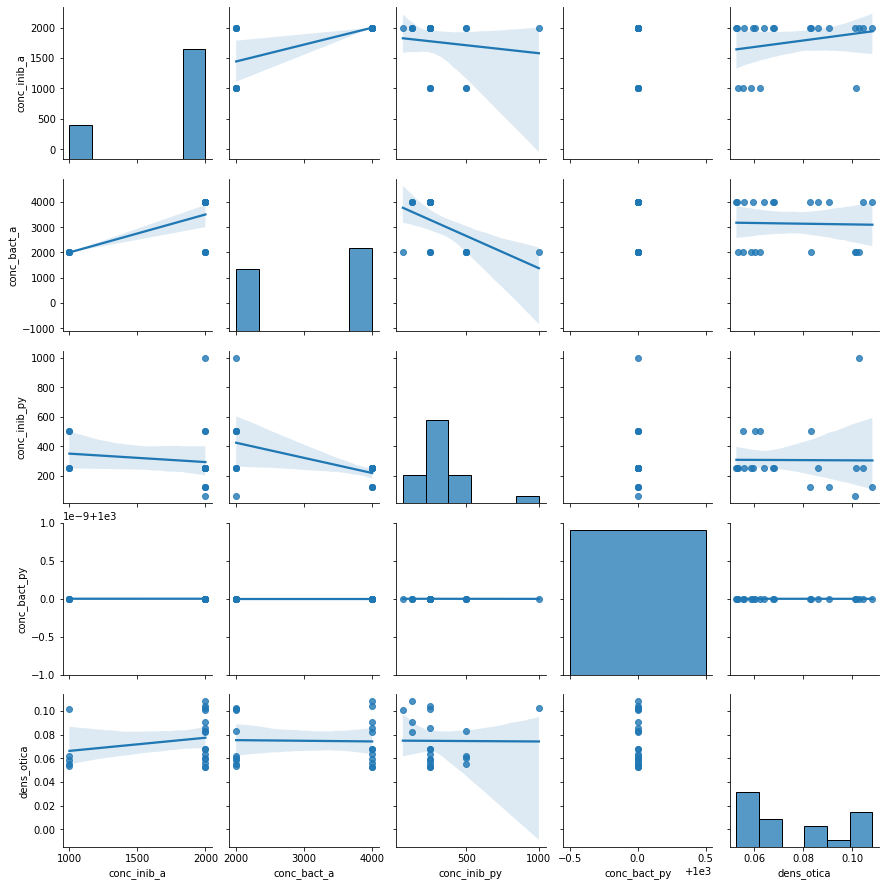

In [450]:
sns.pairplot(concentracao, kind='reg')

# Selecionei abaixo a concentração bact. A e seu comportamento em relação a densidade; Correlação levemnete negativa = -2.8%

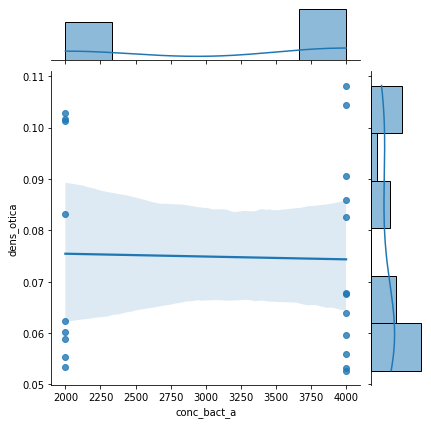

In [451]:
sns.jointplot(x='conc_bact_a', y='dens_otica', data=concentracao, kind='reg')

# # Selecionei abaixo a concentração inibitória A e seu comportamento em relação a densidade; Correlação = 24.40%

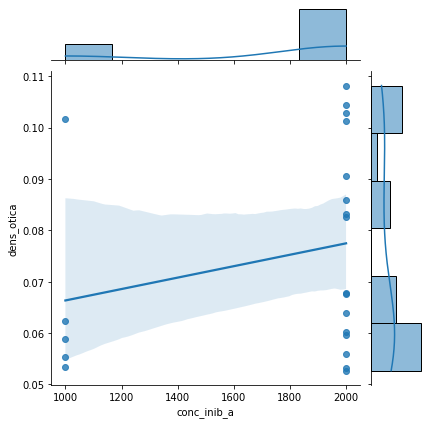

In [548]:
sns.jointplot(x='conc_inib_a', y='dens_otica', data=concentracao, kind='reg')

# Abaixo foram separados 30 % das amostras para teste, e 70 % para treino, usando a aleatoriedade do random_state. y= densidade ótica e as features (x) = foram usados os demais dados.

In [452]:
from sklearn.model_selection import train_test_split

# Usando o StatsModel para a separação dos dados;

In [453]:
y= concentracao['dens_otica']
x=concentracao[['conc_inib_a',	'conc_bact_a', 'conc_inib_py', 'conc_bact_py']]

In [454]:
x_treino, x_teste, y_treino, y_teste=train_test_split(x, y, test_size=0.3, random_state=123)

In [455]:
x_treino.shape

(14, 4)

In [456]:
x_teste.shape

(7, 4)

In [457]:
y_treino.shape

(14,)

In [458]:
y_teste.shape

(7,)

# Foi Usado nesse modelo a Regressão Linear 

In [459]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [460]:
modelo=LinearRegression()

In [461]:
modelo.fit(x_treino, y_treino)

LinearRegression()

# R2 é o coeficiente de determinação

In [549]:
modelo.score(x_treino, y_treino).round(2)*100

34.0

In [463]:
y_previsto= modelo.predict(x_teste)
y_previsto

array([0.0714408 , 0.05505901, 0.05505901, 0.05877778, 0.0714408 ,
       0.09600897, 0.05877778])

In [464]:
y_previsto_treino=modelo.predict(x_treino)
y_previsto_treino


array([0.0714408 , 0.09600897, 0.0714408 , 0.0714408 , 0.10251681,
       0.0714408 , 0.05877778, 0.07330018, 0.0714408 , 0.07330018,
       0.08857144, 0.07330018, 0.0714408 , 0.0714408 ])

# Gráfico5: a densidade comparando a predição x real para os dados de treino;

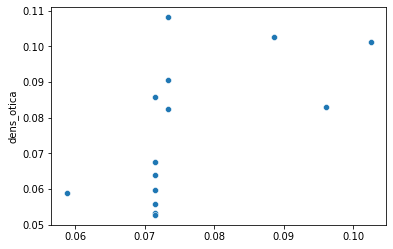

In [465]:
sns.scatterplot(x=y_previsto_treino, y=y_treino)

# Calculando os resíduos (erro)

In [466]:
residuo = y_treino - y_previsto_treino
residuo

20    1.439254e-02
15   -1.289786e-02
14   -1.832969e-02
12   -1.555191e-02
0    -1.308477e-03
1    -1.874635e-02
17    2.081668e-17
9     9.255377e-03
11   -3.843574e-03
10    3.489427e-02
6     1.420634e-02
19    1.725538e-02
2    -1.188524e-02
13   -7.440796e-03
Name: dens_otica, dtype: float64

# Gráfico 6: previsto x o residuo

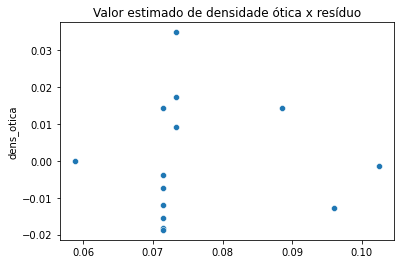

In [467]:
plt.title("Valor estimado de densidade ótica x resíduo")
sns.scatterplot(x=y_previsto_treino, y=residuo)

# Aplicando os dados Estatísticos:

In [469]:

import statsmodels.api as sm

In [470]:
modelo_statsmodel=sm.OLS(y_treino, x_treino).fit()

In [471]:
estatistica = modelo_statsmodel.summary()
estatistica

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             dens_otica   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1.733
Date:                Wed, 10 Aug 2022   Prob (F-statistic):              0.223
Time:                        16:36:11   Log-Likelihood:                 38.566
No. Observations:                  14   AIC:                            -69.13
Df Residuals:                      10   BIC:                            -66.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
conc_inib_a   4.095e-05   2.22e-05      1.842      0.095   -8.57e-06    9.05e-05
conc_bact_a  -1.414e-05   7.25e-06     -1.950      0.080   -3.03e-05    2.02e-06
conc_inib_py -1.488e-05   2.65e-05     -0.562      0.587   -7.39e-05    4.41e-05
conc_bact_py  4.983e-05   3.77e-05      1.323      0.215   -3.41e-05       0.000
==============================================================================
Omnibus:                        1.624   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.118
Skew:                           0.655   Prob(JB):                        0.572
Kurtosis:                       2.552   Cond. No.                         35.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Através desse resultado estatístico não apresentamos uma confiança de 95% dos resultados, com p>0.05, com significância maior que 5%, logo faremos um novo modelo, separando os melhores resultados p; 

## Aplicando o método com o uso de uma constante

In [472]:
constatante=sm.add_constant(x_treino)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [473]:
modelo2=sm.OLS(y_treino, constatante, hasconst=True).fit()


In [474]:
estatistica2 = modelo2.summary()
estatistica2

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             dens_otica   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1.733
Date:                Wed, 10 Aug 2022   Prob (F-statistic):              0.223
Time:                        16:36:11   Log-Likelihood:                 38.566
No. Observations:                  14   AIC:                            -69.13
Df Residuals:                      10   BIC:                            -66.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
conc_inib_a   4.095e-05   2.22e-05      1.842      0.095   -8.57e-06    9.05e-05
conc_bact_a  -1.414e-05   7.25e-06     -1.950      0.080   -3.03e-05    2.02e-06
conc_inib_py -1.488e-05   2.65e-05     -0.562      0.587   -7.39e-05    4.41e-05
conc_bact_py  4.983e-05   3.77e-05      1.323      0.215   -3.41e-05       0.000
==============================================================================
Omnibus:                        1.624   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.118
Skew:                           0.655   Prob(JB):                        0.572
Kurtosis:                       2.552   Cond. No.                         35.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Para o modelo2, usando a constante também não obtivemos um bom resultado. Para isso foi selecianada só duas features, características de x.

# Testando mais um modelo 3: Selecionando os dois valores de concentração bacteriana A e py

In [475]:
y= concentracao['dens_otica']
x=concentracao[['conc_bact_a', 'conc_bact_py']]

In [476]:
x_treino3, x_teste3, y_treino3, y_teste3=train_test_split(x, y, test_size=0.3, random_state=123)

In [477]:
modelo3=LinearRegression()
modelo3.fit(x_treino3, y_treino3)

LinearRegression()

In [478]:
modelo3.score(x_treino3, y_treino3).round(2)

0.12

R2 = 12% coeficiente de determinação R2

In [479]:
y_previsto3= modelo3.predict(x_teste3)
y_previsto3

array([0.07199861, 0.08646875, 0.08646875, 0.08646875, 0.07199861,
       0.08646875, 0.08646875])

In [480]:
y_previsto_treino3=modelo3.predict(x_treino3)
y_previsto_treino3


array([0.07199861, 0.08646875, 0.07199861, 0.07199861, 0.08646875,
       0.07199861, 0.08646875, 0.07199861, 0.07199861, 0.07199861,
       0.08646875, 0.07199861, 0.07199861, 0.07199861])

In [481]:
modelo3_statsmodel=sm.OLS(y_treino3, x_treino3).fit()

In [482]:
estatistica3 = modelo3_statsmodel.summary()
estatistica3

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             dens_otica   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1.615
Date:                Wed, 10 Aug 2022   Prob (F-statistic):              0.228
Time:                        16:36:11   Log-Likelihood:                 36.519
No. Observations:                  14   AIC:                            -69.04
Df Residuals:                      12   BIC:                            -67.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
conc_bact_a  -7.235e-06   5.69e-06     -1.271      0.228   -1.96e-05    5.17e-06
conc_bact_py     0.0001   2.02e-05      5.000      0.000     5.7e-05       0.000
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.683
Skew:                           0.294   Prob(JB):                        0.711
Kurtosis:                       2.091   Cond. No.                         15.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Mudando o X do modelo 3, usando só 2 variáveis a conc_bact_a, conc_bact_py, apenas a conc_bact_py apresentou diferença estatística na densidade óptica, com nível de significancia , p<0.05 ou 5% e confiança > 95%. Porém o R2 não obteve um bom escore.

# Valores que podem ser alterados abaixo, para encontrar a predição.

In [483]:
conc_bact_py=1200
conc_bact_a=2000
entrada= [[conc_bact_py, conc_bact_a]]

In [484]:
densidade_optica_predita= modelo3.predict(entrada)
densidade_optica_predita


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.09225681])

In [485]:
print(densidade_optica_predita, 'para os valores: conc_bact_py=1200, conc_bact_a=2000')

[0.09225681] para os vaores: conc_bact_py=1200, conc_bact_a=2000


# Abaixo o Modelo de predição: Resposta para a densidade ótica(y), considerando as features ( concentração bactericida do produto A e a concentração bactericida do produto Py). 

In [486]:
conc_bact_py=550
conc_bact_a=2100

entrada= [[conc_bact_py, conc_bact_a]]
densidade_optica_predita= modelo3.predict(entrada)

print(densidade_optica_predita)

[0.0969596]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# Abaixo no modelo 4,  foi feito um teste mudando o y (concentração bactericida A), mas houve muita variação, então deixei um y e um x (densidade ótica)

In [502]:
y= concentracao['conc_bact_a']
x=concentracao[['dens_otica']]

In [521]:
x_treino4, x_teste4, y_treino4, y_teste4 =train_test_split(x, y, test_size=0.3, random_state=123)
modelo4=LinearRegression()
modelo4.fit(x_treino4, y_treino4)

LinearRegression()

In [522]:
modelo4.score(x_treino4, y_treino4).round(2)

0.12

In [523]:
y_previsto4= modelo4.predict(x_teste4)
y_previsto_treino4=modelo4.predict(x_treino4)



In [524]:
modelo4_statsmodel=sm.OLS(y_treino4, x_treino4).fit()

In [525]:
estatistica4 = modelo4_statsmodel.summary()
estatistica4

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            conc_bact_a   R-squared (uncentered):                   0.841
Model:                            OLS   Adj. R-squared (uncentered):              0.829
Method:                 Least Squares   F-statistic:                              68.74
Date:                Wed, 10 Aug 2022   Prob (F-statistic):                    1.51e-06
Time:                        16:41:53   Log-Likelihood:                         -121.42
No. Observations:                  14   AIC:                                      244.8
Df Residuals:                      13   BIC:                                      245.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dens_otica  4.144e+04   4998.178      8.291      0.000    3.06e+04    5.22e+04
==============================================================================
Omnibus:                        1.867   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.396
Skew:                          -0.617   Prob(JB):                        0.498
Kurtosis:                       2.066   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Para esse modelo 4, acabei deixando só um x, e isso interferiu na impressão do modelo4. O R2 =84.1% e o P>|t|, p< 0.05 ou 5% de significância para a densidade ótica.